In [1]:
%run precarga_datos_librerias.py
%run scripts/pandas_missing_extension.py

Probando la extension
      a    b
0     a  0.0
1     s  1.0
2  None  2.0
3  None  3.0
4  None  4.0
5     s  5.0
6     d  NaN
7     a  7.0
8     f  8.0
9     a  9.0
     Type  Streak
0      NA       2
1  Not NA       3
2  Not NA       5


/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_extension.py:166: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  case = self._df[[var]].iloc[i].isna().bool()
/home/changery/Platzi/016-Manejo_de_NAs/notebooks/scripts/pandas_missing_ext

# Codificacion de valores faltantes.

Notaciones más comunmente usadas:

In [2]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

# Common NA numbers
common_na_numbers = (
    -9, -99, -999, -9999, 9999, 66, 77, 88, -1
)

# ¿Cómo encontrar los valores comunmente asociados a valores faltantes?

In [3]:
missing_data_example_df = pd.DataFrame.from_dict(dict(
    x = [1, 2, "NA", -99, -98, -99],
    y = ["A", "N/A", "NA", "E", "F", "G"],
    z = [-100, -99, -98, -101, -1, -1]
))



## Revisar los tipos de datos

In [4]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

El primer indicio es observar entradas que no se corresponden con el tipo de dato.

## Valores unicos

In [5]:
missing_data_example_df.x.unique()

array([1, 2, 'NA', -99, -98], dtype=object)

Puede ser que esto facilite la visualizacion de valores faltantes anotados de forma erratica.

In [6]:
# Selecciona todas las no numericas
missing_data_example_df.select_dtypes(object)

,x,y
0,1,A
1,2,N/A
2,NA,NA
3,-99,E
4,-98,F
5,-99,G


El hecho de encontrar valores numericos en columnas categoricas puede dar indicio a presencia de valores faltantes.

## Sustitución de valores faltantes

### Sustitucion desde la lectura de datos.

Implica que ya conoces la estructura de tu dataset, y de como son almacenadas las variables en las bases de datos.

In [7]:
pd.read_csv(
    f"{raw}/missing_data_encoding_example.csv",
    na_filter=True,
    # Aniadir las representaciones a valores NaN
    na_values=[-99, -1]
)

,Unnamed: 0,x,y,z
0,0,1.0,A,-100.0
1,1,2.0,NaN,NaN
2,2,NaN,NaN,-98.0
3,3,NaN,E,-101.0
4,4,-98.0,F,NaN
5,5,NaN,G,NaN


## Sustitucion global

In [8]:
(
    missing_data_example_df.
    replace(
    to_replace=[-99, "NA"]
)
)

/tmp/ipykernel_49964/3693780630.py:3: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  replace(


,x,y,z
0,1,A,-100
1,2,N/A,-100
2,2,N/A,-98
3,2,E,-101
4,-98,F,-1
5,-98,G,-1


## Sustitucion dirigida
Para aplicar reglas de sustitucion sólo a una columna dirigida.

In [9]:
# En este caso se reemplaza -99 por np.nan solo en la columna x
(
    missing_data_example_df.
    replace(
        to_replace={
            "x":{
                -99: np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,2,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


# Conversión de valores faltantes implicitos en explicitos.

Valores faltantes implicitos suceden cuando, por ejemplo, faltan LOS REGISTROS ENTEROS respecto a la medición estándar de los datos para ciertas variables cualitativas.

In [10]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        'name': ["Linda", "Linda", "Linda", "Fea"],
        'time': ['morning', 'afternoon', 'night', 'morning'],
        'value':[350, 310, np.nan, 320]
    }
)
implicit_to_explicit_df

,name,time,value
0,Linda,morning,350.0
1,Linda,afternoon,310.0
2,Linda,night,NaN
3,Fea,morning,320.0


Lo anterior es una mezcla de valores faltantes implicitos y explicitos

## Pivotar tabla de datos.

In [11]:
(
    implicit_to_explicit_df
    .pivot(
        index='name',
        columns='time',
        values='value'
    )
)

time,afternoon,morning,night
name,,,
Fea,NaN,320.0,NaN
Linda,310.0,350.0,NaN


In [12]:
itoe_pivoted = pd.pivot(
    data = implicit_to_explicit_df,
    index = 'name',
    columns = 'time',
    values = 'value'
)

In [13]:
itoe_pivoted.reset_index()

time,name,afternoon,morning,night
0,Fea,NaN,320.0,NaN
1,Linda,310.0,350.0,NaN


In [14]:
pd.melt(
    itoe_pivoted.reset_index(),
    id_vars = ["name"],
    value_vars = ["afternoon", "morning", "night"]
)

,name,time,value
0,Fea,afternoon,NaN
1,Linda,afternoon,310.0
2,Fea,morning,320.0
3,Linda,morning,350.0
4,Fea,night,NaN
5,Linda,night,NaN


Esto es lo contrario a hacer un melt de data frames.

## Cuantificar la ocurrencia de n tuplas.

In [15]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name']
    )
    .reset_index(name = 'n')
    .query('n < 3')
)

,name,n
1,Fea,1


El observar que hay valores menores al estandar de mediciones por variable cuantitativa implica la presencia de valores faltantes.

# Conversión de filas faltantes implícitas en explícitas.

janitor realiza funciones similares a tidyR.

## Exponer n-tuplas de valores faltantes.

Ejemplo: encontrar los pares faltantes de name y time.

In [16]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time"
    )
)


,name,time,value
0,Fea,afternoon,NaN
1,Fea,morning,320.0
2,Fea,night,NaN
3,Linda,afternoon,310.0
4,Linda,morning,350.0
5,Linda,night,NaN


## Limitar la exposición de n-tuplas de valores faltantes.

In [17]:
(
    implicit_to_explicit_df
    .complete(
        {"name": ["Fea", "Linda"]},
        {"time": ["morning", "afternoon"]},
        sort = True
    )
)

,name,time,value
0,Fea,afternoon,NaN
1,Fea,morning,320.0
2,Linda,afternoon,310.0
3,Linda,morning,350.0
4,Linda,night,NaN


## Rellenar los valores faltantes por OTRO NA de notación útil.

In [18]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value=np.nan
    )
)

,name,time,value
0,Fea,afternoon,NaN
1,Fea,morning,320.0
2,Fea,night,NaN
3,Linda,afternoon,310.0
4,Linda,morning,350.0
5,Linda,night,NaN


## Limitar el rellenado de valores faltantes
Para distinguir los valores faltantes indicados desde el inicio y los nuevos valores faltantes encontrados.

In [19]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value=0,
        explicit=False
    )
)
# Evitar rellenar los explicitos

,name,time,value
0,Fea,afternoon,0.0
1,Fea,morning,320.0
2,Fea,night,0.0
3,Linda,afternoon,310.0
4,Linda,morning,350.0
5,Linda,night,NaN


# Tipos de valores faltantes

In [20]:
pima_indians_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Recodificación de NAs

In [25]:
pima_indians_diabetes[pima_indians_diabetes.columns[1:6]] = pima_indians_diabetes[pima_indians_diabetes.columns[1:6]].replace(0, np.nan)

In [26]:
pima_indians_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [27]:
pima_indians_diabetes.missing.variable_summary()

,variable,n_cases,n_na,n_not_na,na_proportion,na_percentage
0,Pregnancies,768,0,768,0.000000,0.000000
1,Glucose,768,5,763,0.006510,0.651042
2,BloodPressure,768,35,733,0.045573,4.557292
3,SkinThickness,768,227,541,0.295573,29.557292
4,Insulin,768,374,394,0.486979,48.697917
5,BMI,768,11,757,0.014323,1.432292
6,DiabetesPedigreeFunction,768,0,768,0.000000,0.000000
7,Age,768,0,768,0.000000,0.000000
8,Outcome,768,0,768,0.000000,0.000000


## _Missing Completeley At Random_

In [28]:
pima_indians_diabetes.missing.sort_by_n_na()

,Insulin,SkinThickness,BloodPressure,BMI,Glucose,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,NaN,35.0,72.0,33.6,148.0,6,0.627,50,1
1,NaN,29.0,66.0,26.6,85.0,1,0.351,31,0
2,NaN,NaN,64.0,23.3,183.0,8,0.672,32,1
3,94.0,23.0,66.0,28.1,89.0,1,0.167,21,0
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,180.0,48.0,76.0,32.9,101.0,10,0.171,63,0
764,NaN,27.0,70.0,36.8,122.0,2,0.340,27,0
765,112.0,23.0,72.0,26.2,121.0,5,0.245,30,0
766,NaN,NaN,60.0,30.1,126.0,1,0.349,47,1


<Axes: >

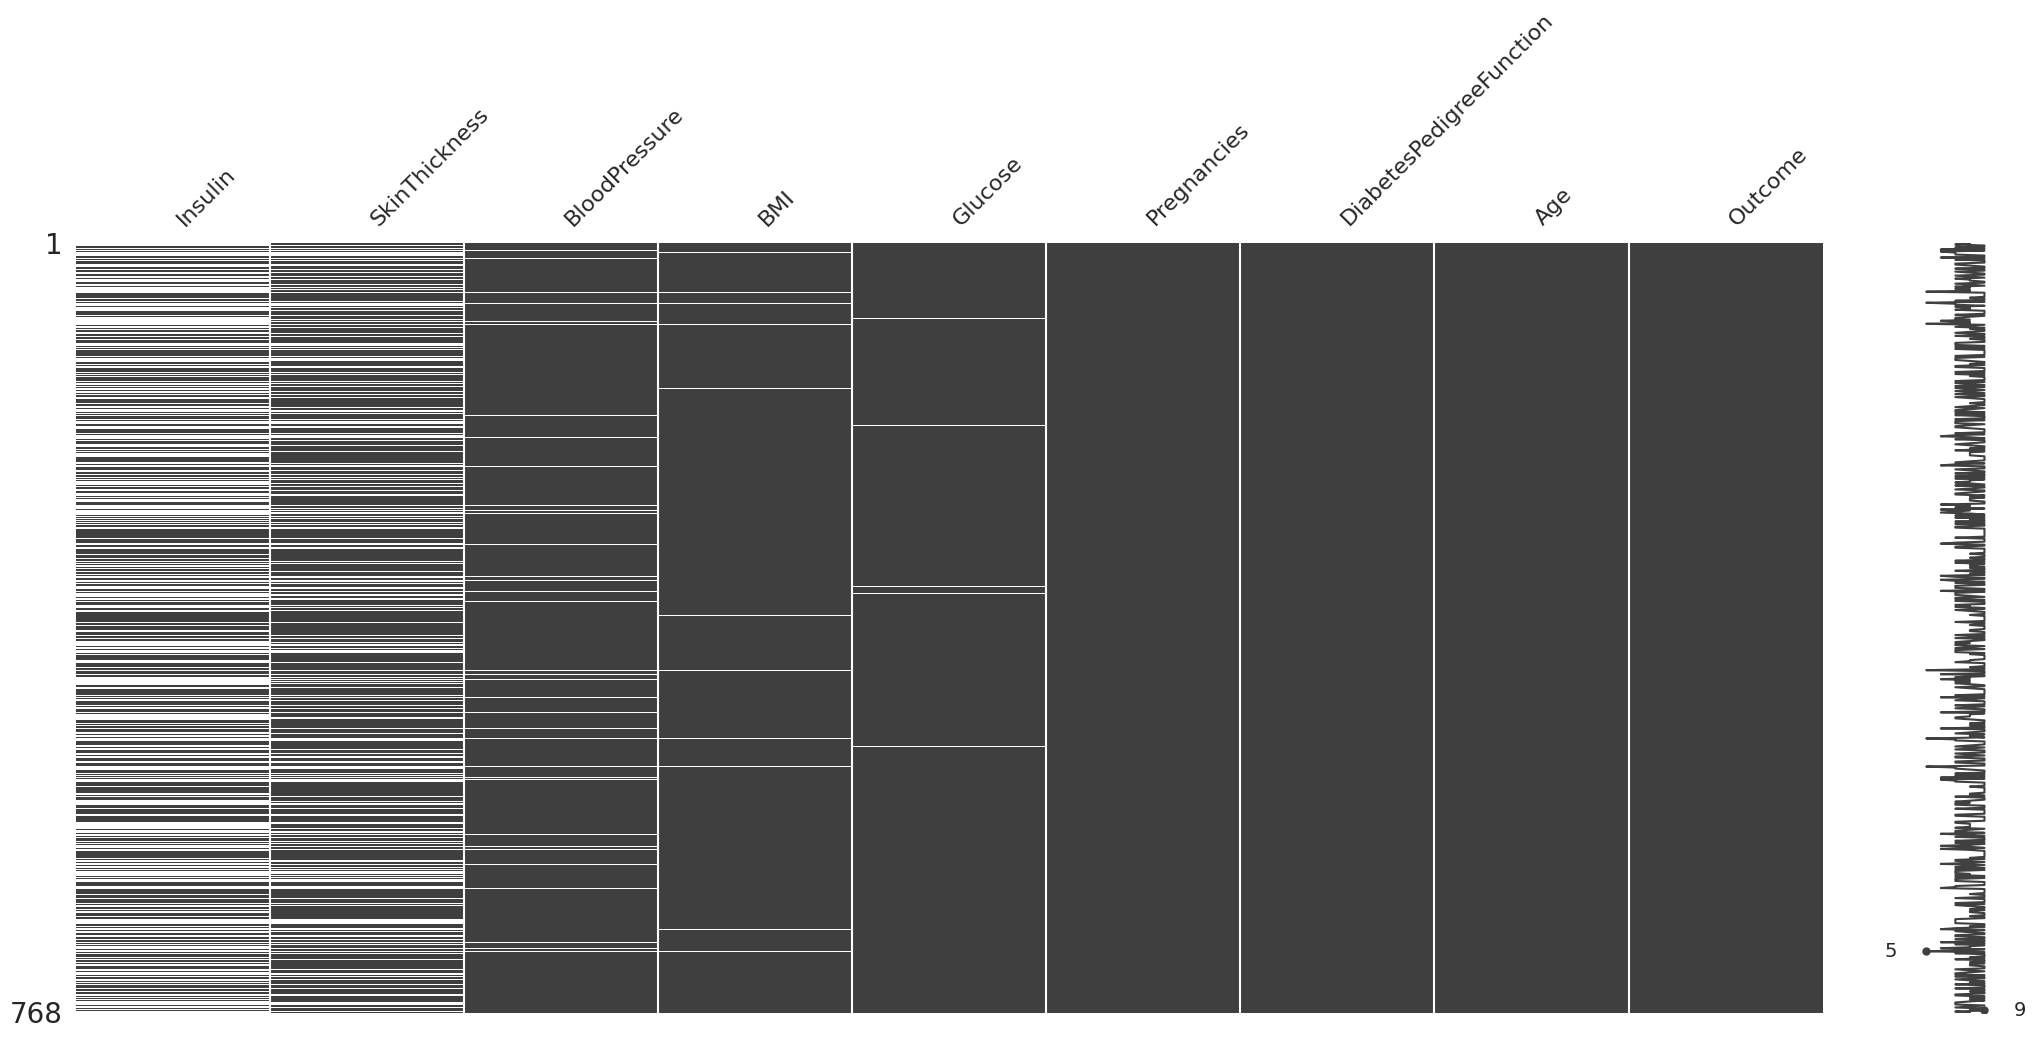

In [29]:
pima_indians_diabetes.missing.sort_by_n_na().pipe(
    lambda df : missingno.matrix(df)
)

No obstante, para el BMI y para glucosa hay muy pocos valores faltantes, su falta es tan poco frecuente que es posible que sean MCAR, perdidos solo por azar.

## _Missing At Random_

<Axes: >

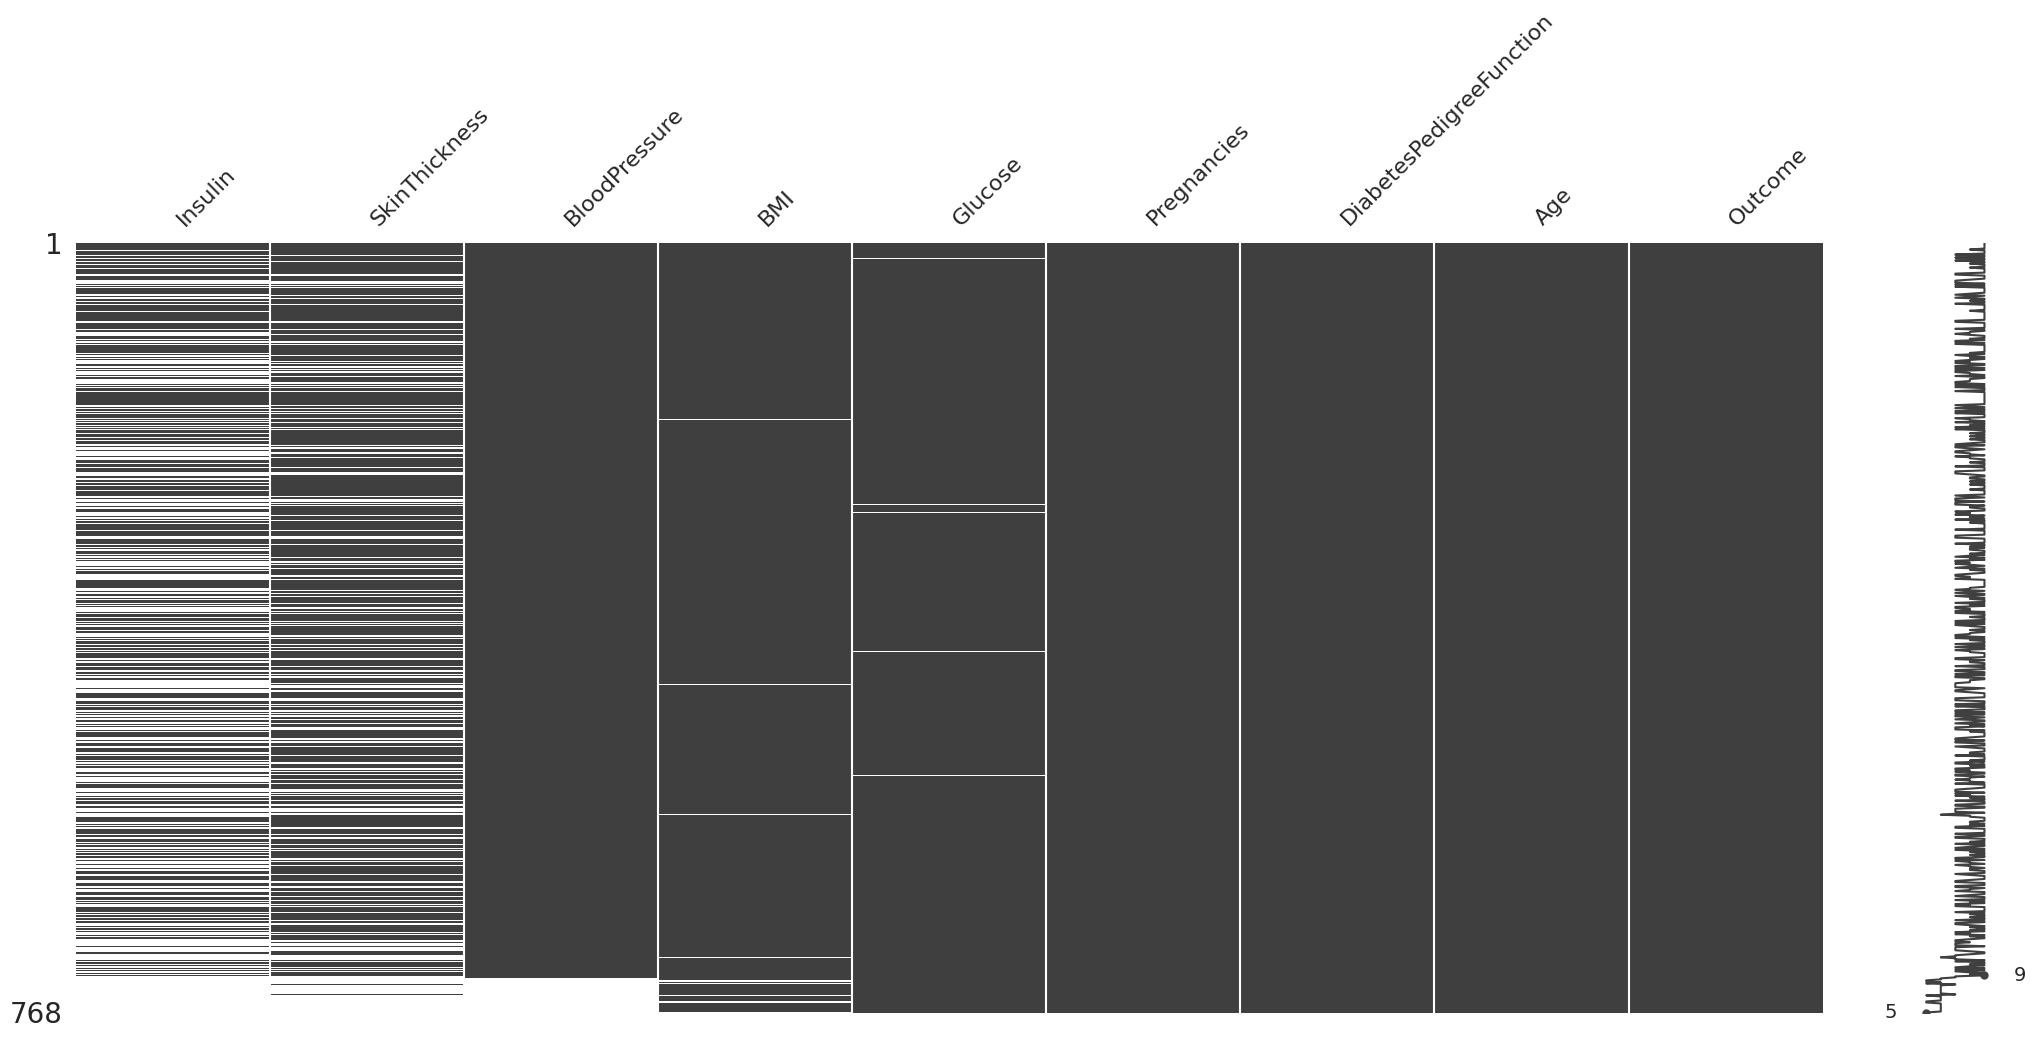

In [37]:
(
    pima_indians_diabetes
    .missing.sort_by_n_na()
    .sort_values(by=["BloodPressure"])
    .pipe(missingno.matrix)
)

La presión de la sangre tiene valores faltantes, igual los mismos datos en otras variables. Por lo tanto es probable que la perdida dependa de algún valor que se esté midiendo.

## _MNAR_

<Axes: >

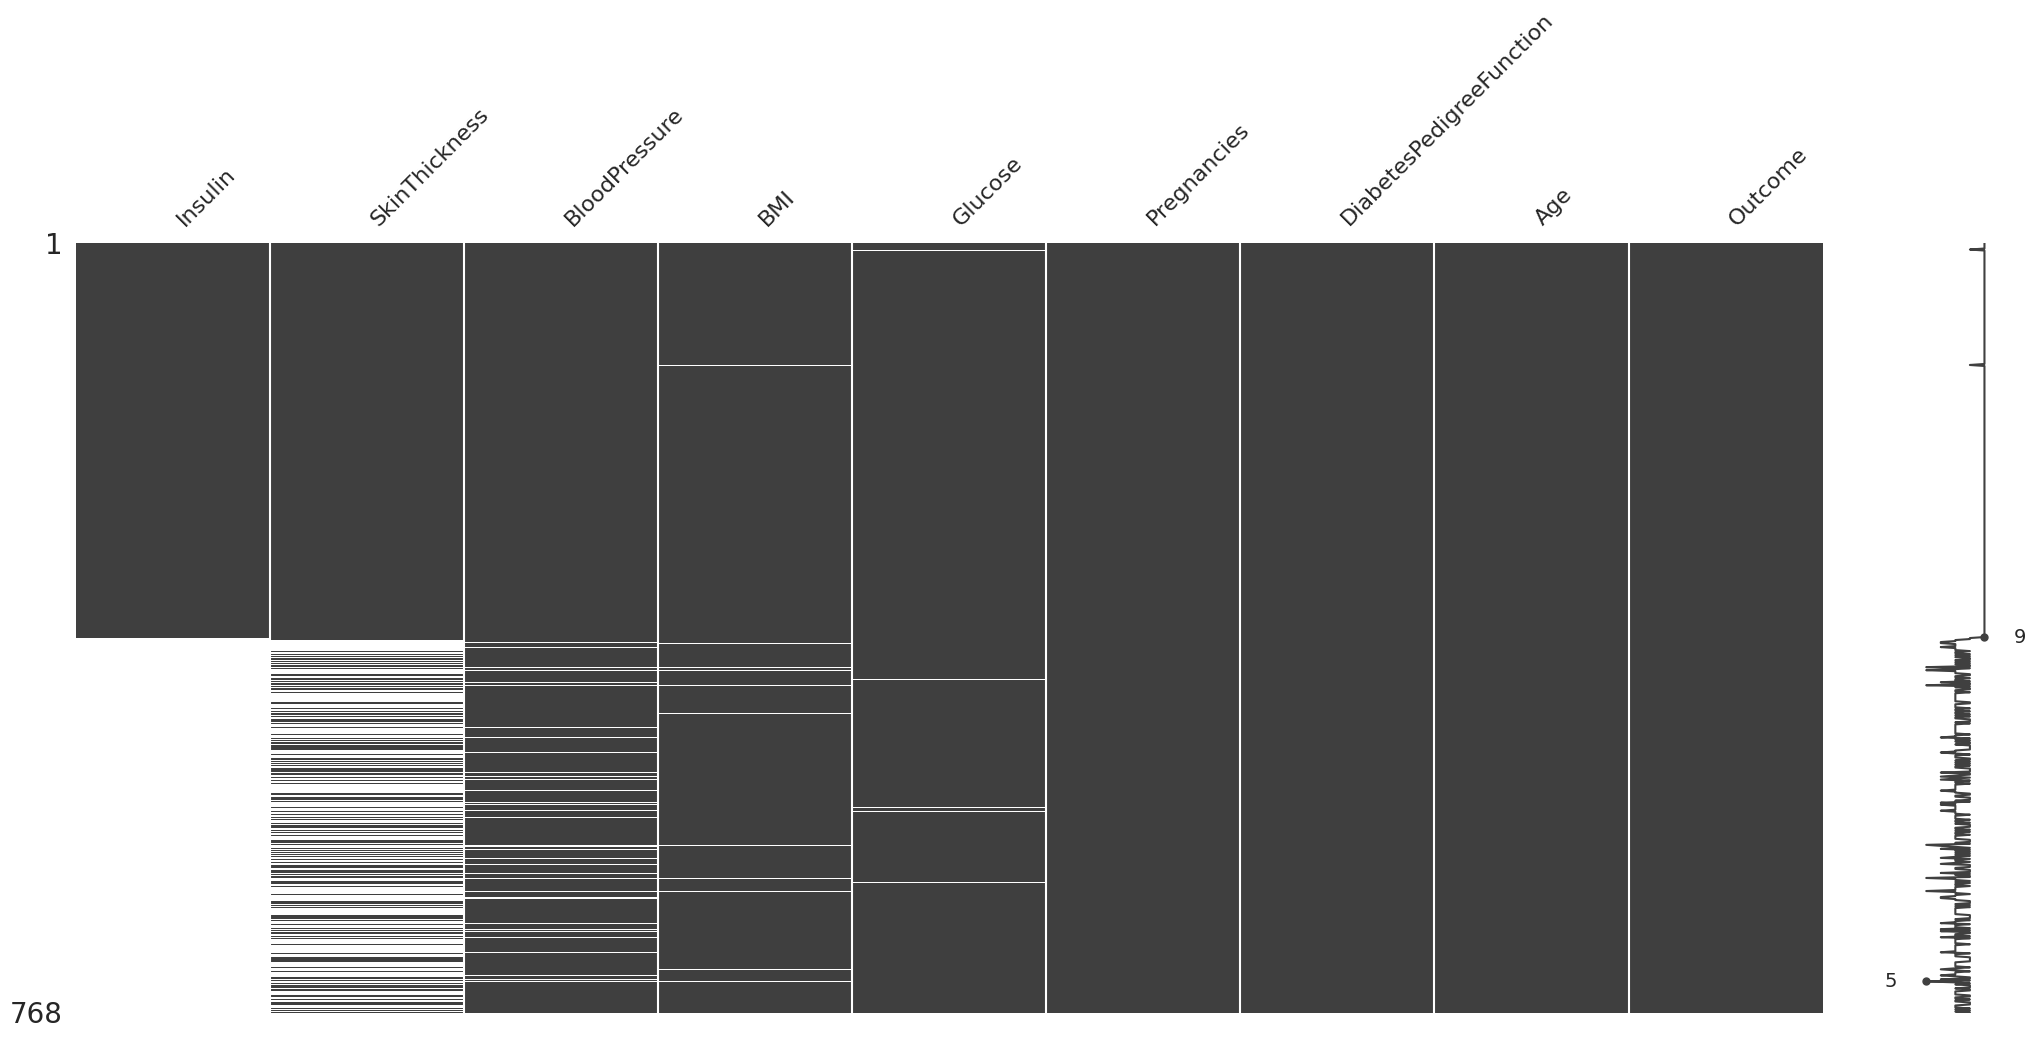

In [38]:
(
    pima_indians_diabetes
    .missing.sort_by_n_na()
    .sort_values(by=["Insulin"])
    .pipe(missingno.matrix)
)

Caso MNAR, está ausente la insulina por alguna razón que podría o no estar en el data set.